In [254]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

In [255]:
df = pd.DataFrame({'cases_vax' : [95,133,175,127,134,90,23,2],
                  'cases_no_vax' : [25,33,33,18,16,7,2,0],
                  'pct_pop_vax' : [0.78,0.83,0.86,0.89,0.91,0.95,0.94,0.93]},
                  index=['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])

### new data 210721 Twitter Ben Marten ### 
# https://twitter.com/RanIsraeli/status/1417792136670498821?s=20 #

df = pd.DataFrame({'cases_vax' : [441,481,554,366,363,236,68,0],
                  'cases_no_vax' : [124,127,113,53,33,18,8,0],
                  'pct_pop_vax' : [0.79,0.83,0.86,0.90,0.96,0.91,0.94,0]},
                  index=['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'])



### manipulation of base values ###
df.index.name='age'
#df[['cases_vax','cases_no_vax']] *= 3
df

,cases_vax,cases_no_vax,pct_pop_vax
age,,,
20-29,441,124,0.79
30-39,481,127,0.83
40-49,554,113,0.86
50-59,366,53,0.90
60-69,363,33,0.96
70-79,236,18,0.91
80-89,68,8,0.94
90+,0,0,0.00


In [256]:
df['pct_vax_of_cases'] = df['cases_vax'] / (df['cases_vax'] + df['cases_no_vax'])
df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases
age,,,,
20-29,441,124,0.79,0.780531
30-39,481,127,0.83,0.791118
40-49,554,113,0.86,0.830585
50-59,366,53,0.90,0.873508
60-69,363,33,0.96,0.916667
70-79,236,18,0.91,0.929134
80-89,68,8,0.94,0.894737
90+,0,0,0.00,NaN


In [257]:
### assume population in each age group is n ###

POP = 1e3

df['pop_vax'] = POP * df['pct_pop_vax']
df['pop_non_vax'] = POP * (1 - df['pct_pop_vax'])

df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax
age,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0
30-39,481,127,0.83,0.791118,830.0,170.0
40-49,554,113,0.86,0.830585,860.0,140.0
50-59,366,53,0.90,0.873508,900.0,100.0
60-69,363,33,0.96,0.916667,960.0,40.0
70-79,236,18,0.91,0.929134,910.0,90.0
80-89,68,8,0.94,0.894737,940.0,60.0
90+,0,0,0.00,NaN,0.0,1000.0


In [258]:
df['incidence_vax'] = df['cases_vax'] / df['pop_vax']
df['incidence_non_vax'] = df['cases_no_vax'] / df['pop_non_vax']

df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax
age,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000


In [259]:
df['rel_diff'] = df['incidence_vax'] / df['incidence_non_vax']
df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax,rel_diff
age,,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476,0.945386
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059,0.775733
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143,0.798107
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000,0.767296
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000,0.458333
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000,1.296703
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333,0.542553
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000,NaN


In [260]:
df['rel_diff'].replace(np.inf,np.nan,inplace=True)
df['efficacy'] = 1 - df['rel_diff']
df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax,rel_diff,efficacy
age,,,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476,0.945386,0.054614
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059,0.775733,0.224267
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143,0.798107,0.201893
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000,0.767296,0.232704
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000,0.458333,0.541667
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000,1.296703,-0.296703
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333,0.542553,0.457447
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000,NaN,NaN


(array([  26.,  213.,  855., 1845., 2597., 2313., 1438.,  571.,  136.,
           6.]),
 array([0.1378193 , 0.21290295, 0.28798659, 0.36307023, 0.43815387,
        0.51323751, 0.58832115, 0.66340479, 0.73848843, 0.81357208,
        0.88865572]),
 <BarContainer object of 10 artists>)

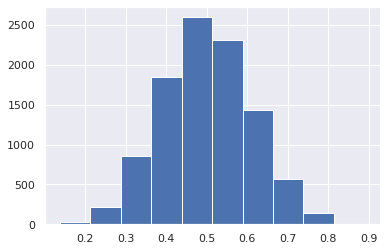

In [261]:
import pymc3 as pm
import arviz as az 


test_prior = pm.Beta.dist(alpha=10,beta=10).random(size=10000)
plt.hist(test_prior)


In [262]:
def efficacy_dist(N_A,K_A,N_B,K_B,age_grp_name,ref_val=True):

    ### A = vax, B = no_vax ### 

    with pm.Model() as model:
    
        
        p_A = pm.Beta('p_A',alpha=K_A,beta=N_A-K_A)
        p_B = pm.Beta('p_B',alpha=K_B,beta=N_B-K_B)
        
        obs_A = pm.Binomial('obs_A',n=N_A,p=p_A,observed=K_A) 
        obs_B = pm.Binomial('obs_B',n=N_B,p=p_B,observed=K_B)

        # define metrics
        pm.Deterministic('diff_p_A - p_B', p_A - p_B)
        pm.Deterministic('rel_p_A / p_B', (p_A/p_B) - 1)
        pm.Deterministic('efficacy',(1-p_A/p_B))

        trace = pm.sample(progressbar=True)

        print (az.summary(trace,hdi_prob=0.89))
        az.plot_trace(trace)

        fig,ax = plt.subplots(1,1,figsize=(18,12))
        if ref_val:
            az.plot_posterior(trace,hdi_prob=0.89,ref_val=0,var_names='efficacy',ax=ax)
        else:
            az.plot_posterior(trace,hdi_prob=0.89,var_names='efficacy',ax=ax)

            
        ax.set_title('Efficacy for group : ' + age_grp_name)

# skip last row with NAN
for r,c in df.dropna().iterrows():
    name = r
    N_A = c['pop_vax']
    K_A = c['cases_vax']
    N_B = c['pop_non_vax']
    K_B = c['cases_no_vax']
    
    #efficacy_dist(N_A,K_A,N_B,K_B,name)

In [263]:
df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax,rel_diff,efficacy
age,,,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476,0.945386,0.054614
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059,0.775733,0.224267
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143,0.798107,0.201893
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000,0.767296,0.232704
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000,0.458333,0.541667
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000,1.296703,-0.296703
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333,0.542553,0.457447
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000,NaN,NaN


In [264]:
df[['incidence_vax','incidence_non_vax']].melt().mean()

value    0.448761
dtype: float64

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='age'>

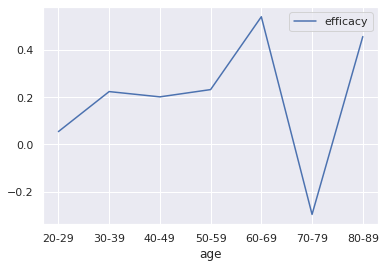

In [265]:
df.plot(y='efficacy')

In [266]:
cases = df[['cases_vax','cases_no_vax']].melt()
cases.columns = ['vax_status','cases']

pop = df[['pop_vax','pop_non_vax']].melt()
pop.columns = ['pop','count']

combined_df = pd.concat([cases,pop],axis=1)
combined_df['age'] = np.tile(df.index.values,2)
combined_df['vax_idx'] = combined_df['vax_status'].apply(lambda x : 0 if 'no_vax' in x else 1 )
combined_df['age_idx'] = np.tile([0,1,2,3,4,5,6,7],2)
combined_df.drop([7,15],inplace=True)

combined_df

,vax_status,cases,pop,count,age,vax_idx,age_idx
0,cases_vax,441,pop_vax,790.0,20-29,1,0
1,cases_vax,481,pop_vax,830.0,30-39,1,1
2,cases_vax,554,pop_vax,860.0,40-49,1,2
3,cases_vax,366,pop_vax,900.0,50-59,1,3
4,cases_vax,363,pop_vax,960.0,60-69,1,4
5,cases_vax,236,pop_vax,910.0,70-79,1,5
6,cases_vax,68,pop_vax,940.0,80-89,1,6
8,cases_no_vax,124,pop_non_vax,210.0,20-29,0,0
9,cases_no_vax,127,pop_non_vax,170.0,30-39,0,1
10,cases_no_vax,113,pop_non_vax,140.0,40-49,0,2


In [267]:
### Hierarchical model with partial pooling on vax status and age, showing shrinkage ###
### weird is that age grp 80-89 is pulled upwards, away from avg...! ###

### Incidence for  80-89 is very low, and nr of cases and pop for non-vax is low. Incidence for non-vax 80-89 is 
### therefore pulled up from analytical 0.03 to 0.07 (shrinkage ! ) THAT causes efficacy to grow so much! ###

### partial due to separate alpha_bars for non-vaxed vs vaxed ###

def logit_pure(x):
    return (np.exp(x)) / (1 + np.exp(x))

def logistic_pure(p):
    return np.log(p / (1 - p))

coords = {'vax_status' : ['no_vax','vax'],
         'age' : ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']}

with pm.Model(coords=coords) as model:
    
    alpha_bar_bar = pm.Normal('alpha_bar_bar',mu=0,sd=1.5)
    
    ### separate alpha_bar for non-vax vs vax ###
    ### # must explicitly create 2x1 matrix asop 2 vec for broadcast to work ###
    alpha_bar = pm.Normal('alpha_bar',mu=alpha_bar_bar,sd=1.5,shape=(2,1))  
    
    sigma = pm.Exponential('sigma',1)
    
    #alpha = pm.Normal('alpha',mu=alpha_bar,sd=sigma,shape=(2,7))
    alpha = pm.Normal('alpha',mu=alpha_bar,sd=sigma,dims=['vax_status','age'])
    
    p_alpha = pm.Deterministic('p_alpha',logit_pure(alpha),dims=['vax_status','age'])
    
    p_alpha_diff = pm.Deterministic('p_alpha_diff',p_alpha[1] - p_alpha[0],dims='age')
    
    p_alpha_rel_diff = pm.Deterministic('p_alpha_rel_diff',p_alpha[1] / p_alpha[0],dims='age')
    
    efficacy = pm.Deterministic('efficacy',1 - p_alpha_rel_diff,dims='age')
    
    
    obs = pm.Binomial('obs',n=combined_df['count'],p=logit_pure(alpha[combined_df['vax_idx'],
                                                                     combined_df['age_idx']]),
                      observed=combined_df['cases'])
    
    trace = pm.sample(500,tune=500,target_accept=0.99)

<ipython-input-267-3c5d1a3c92ca>:44: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(500,tune=500,target_accept=0.99)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, sigma, alpha_bar, alpha_bar_bar]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 6 seconds.


                      mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
alpha_bar_bar       -0.057  0.916    -1.631      1.300      0.029    0.030   
alpha_bar[0,0]       0.179  0.489    -0.580      0.902      0.017    0.016   
alpha_bar[1,0]      -0.444  0.445    -1.152      0.264      0.016    0.012   
alpha[0,0]           0.383  0.138     0.178      0.603      0.004    0.003   
alpha[0,1]           1.068  0.188     0.765      1.363      0.005    0.004   
alpha[0,2]           1.412  0.206     1.073      1.735      0.007    0.005   
alpha[0,3]           0.130  0.207    -0.182      0.472      0.007    0.006   
alpha[0,4]           1.456  0.374     0.849      2.044      0.011    0.009   
alpha[0,5]          -1.323  0.258    -1.717     -0.912      0.009    0.006   
alpha[0,6]          -1.734  0.348    -2.251     -1.132      0.011    0.008   
alpha[1,0]           0.234  0.067     0.125      0.339      0.002    0.002   
alpha[1,1]           0.317  0.072     0.208      0.438      0.00

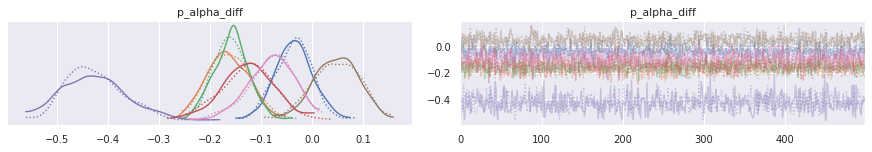

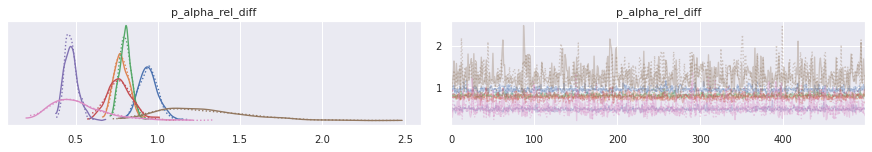

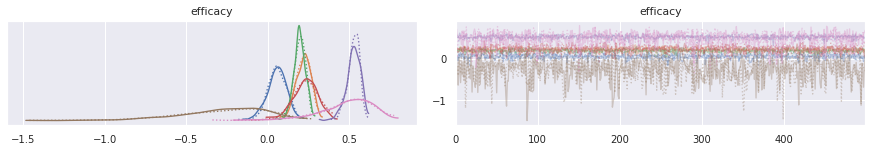

In [268]:
with model:
    print(az.summary(trace,hdi_prob=0.89))
    
    az.plot_trace(trace,var_names=['p_alpha_diff'])
    az.plot_trace(trace,var_names='p_alpha_rel_diff')
    az.plot_trace(trace,var_names='efficacy')

In [269]:
### avg incidence non-vax vs vax ###
logit_pure(trace['alpha_bar']).mean(axis=0)

array([[0.54218869],
       [0.39559991]])

In [306]:
inc_mean_calc = (combined_df['cases'] / combined_df['count']).mean()
inc_mean_calc

0.4808154230659345

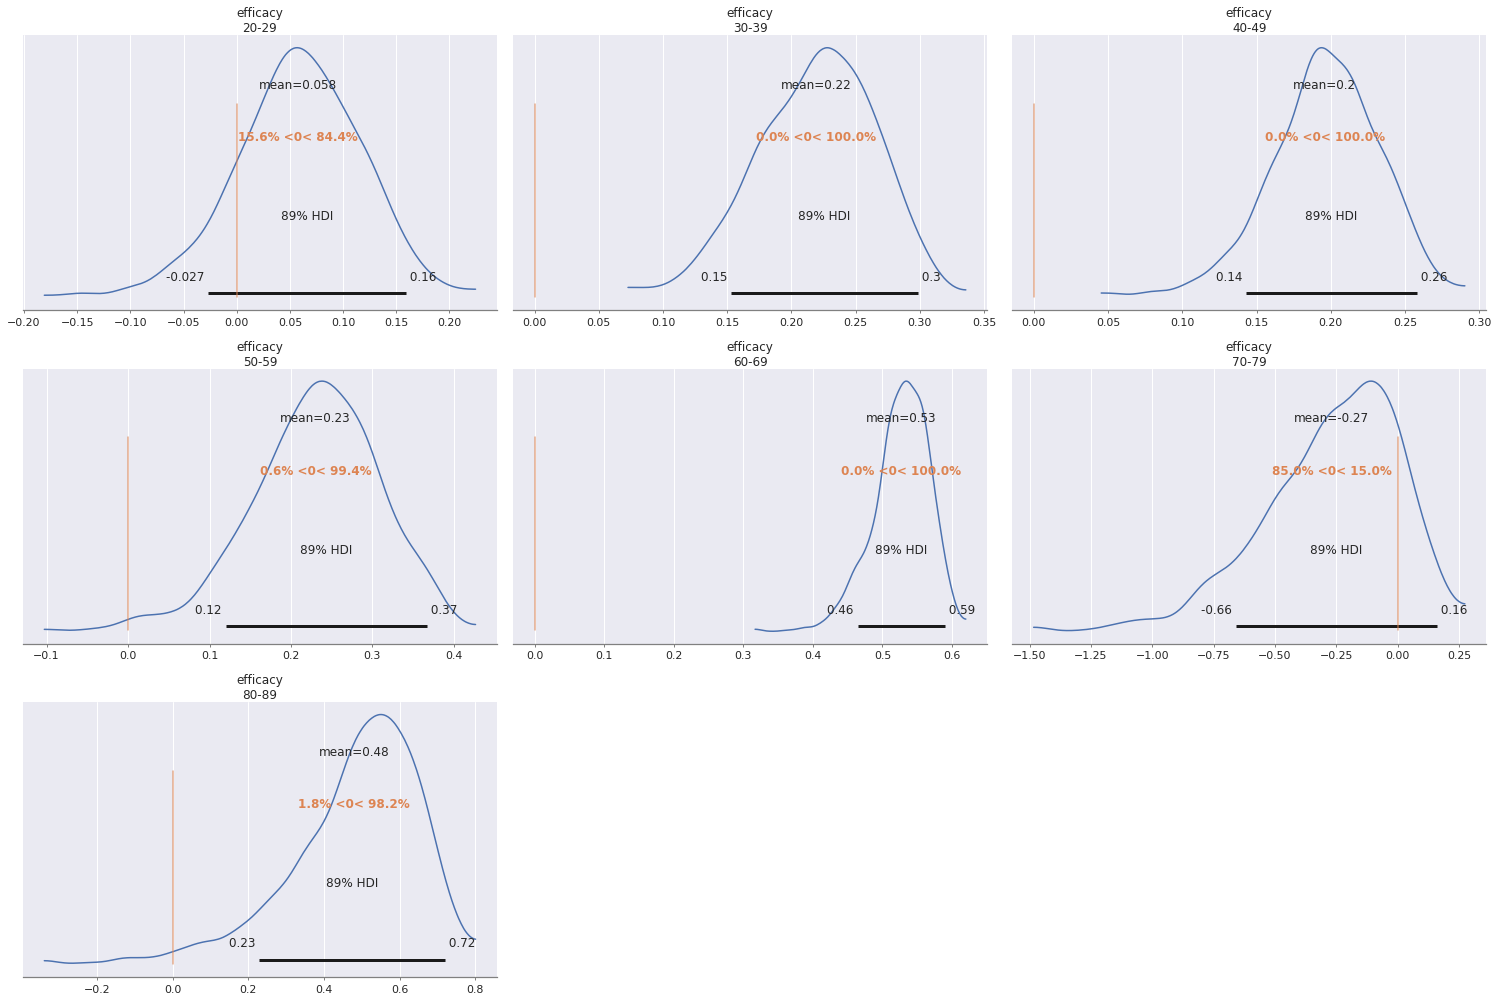

In [271]:
with model:
    az.plot_posterior(trace,var_names='efficacy',ref_val=0,hdi_prob=0.89)
plt.savefig('ARVIZ_posterior.jpg',format='jpg')

In [272]:
### using inferenceData to enable selection of sep. subplots,and getting real names, by using coords ###
idata = az.from_pymc3(trace,model=model)
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

array([<AxesSubplot:title={'center':'efficacy\n70-79'}>,
       <AxesSubplot:title={'center':'efficacy\n80-89'}>], dtype=object)

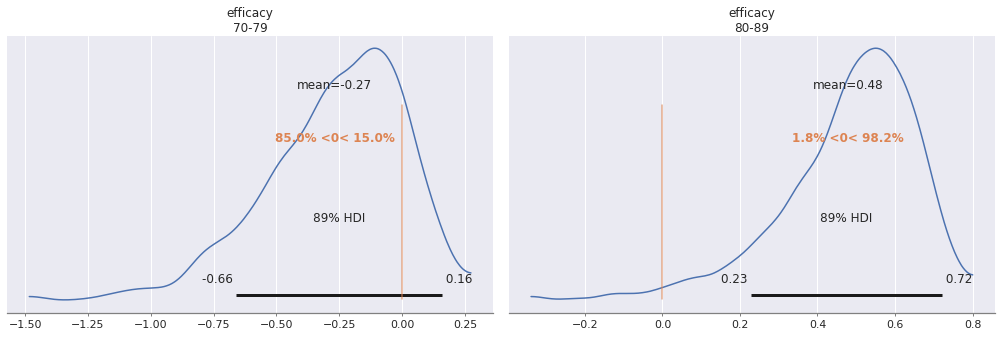

In [273]:
az.plot_posterior(idata,var_names='efficacy',coords={'age' : ['70-79','80-89']},
                  ref_val=0,hdi_prob=0.89)

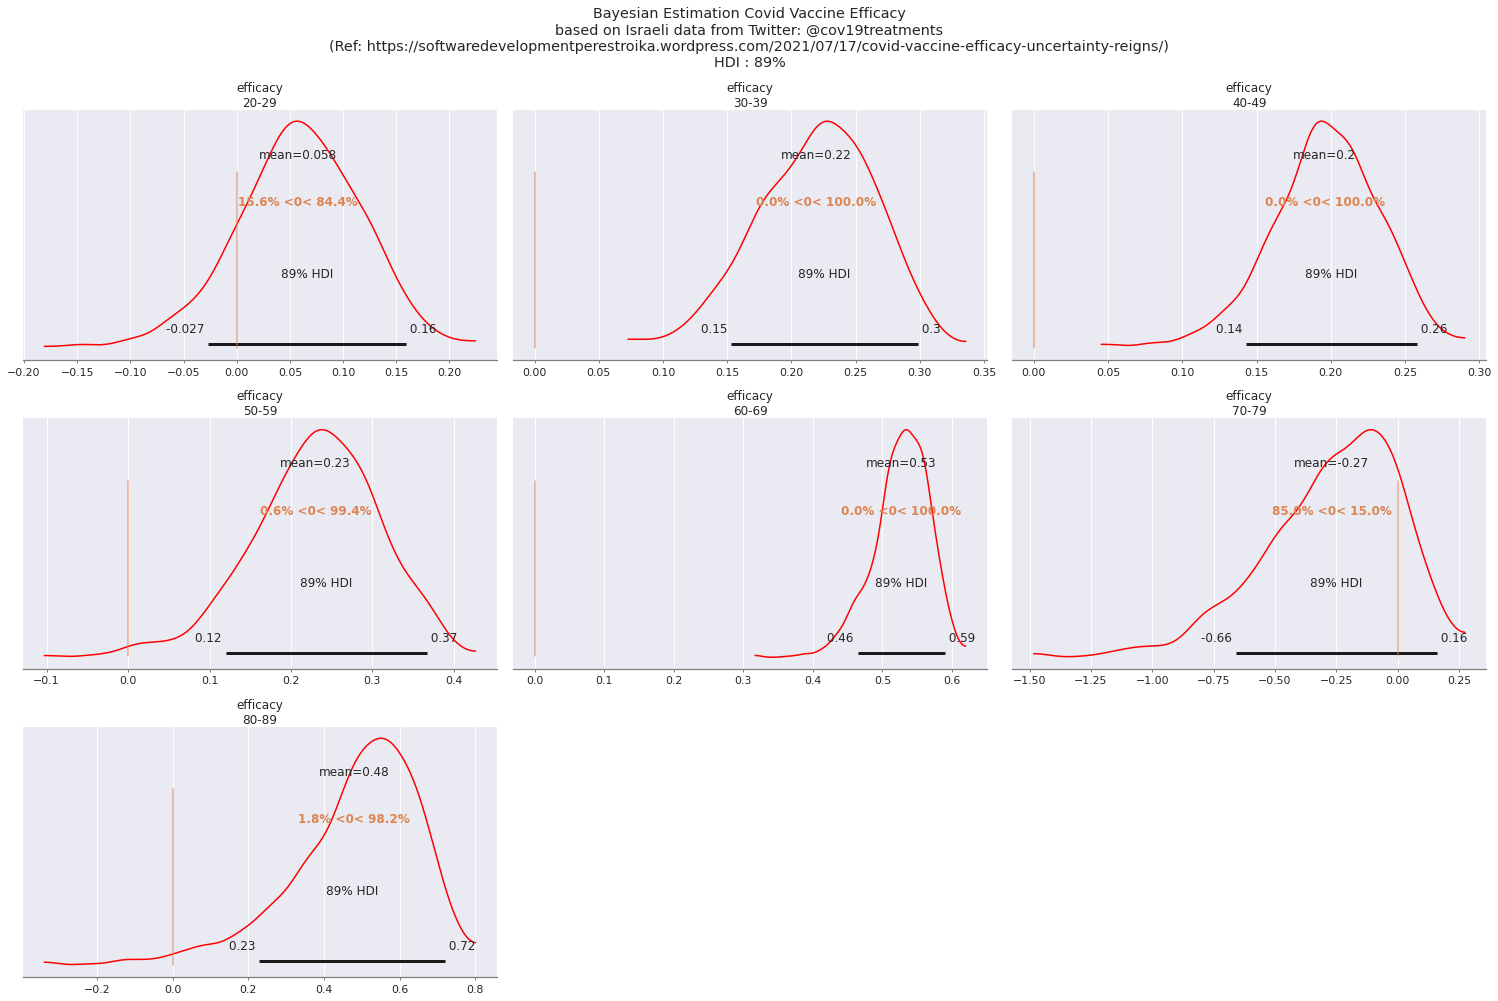

In [274]:

az.plot_posterior(idata,var_names='efficacy',color='red',hdi_prob=0.89,ref_val=0)
plt.suptitle('Bayesian Estimation Covid Vaccine Efficacy\nbased on Israeli data from Twitter: @cov19treatments\n(Ref: https://softwaredevelopmentperestroika.wordpress.com/2021/07/17/covid-vaccine-efficacy-uncertainty-reigns/)\nHDI : 89%')
plt.savefig('ISR_posterior_plot.jpg',format='jpg')

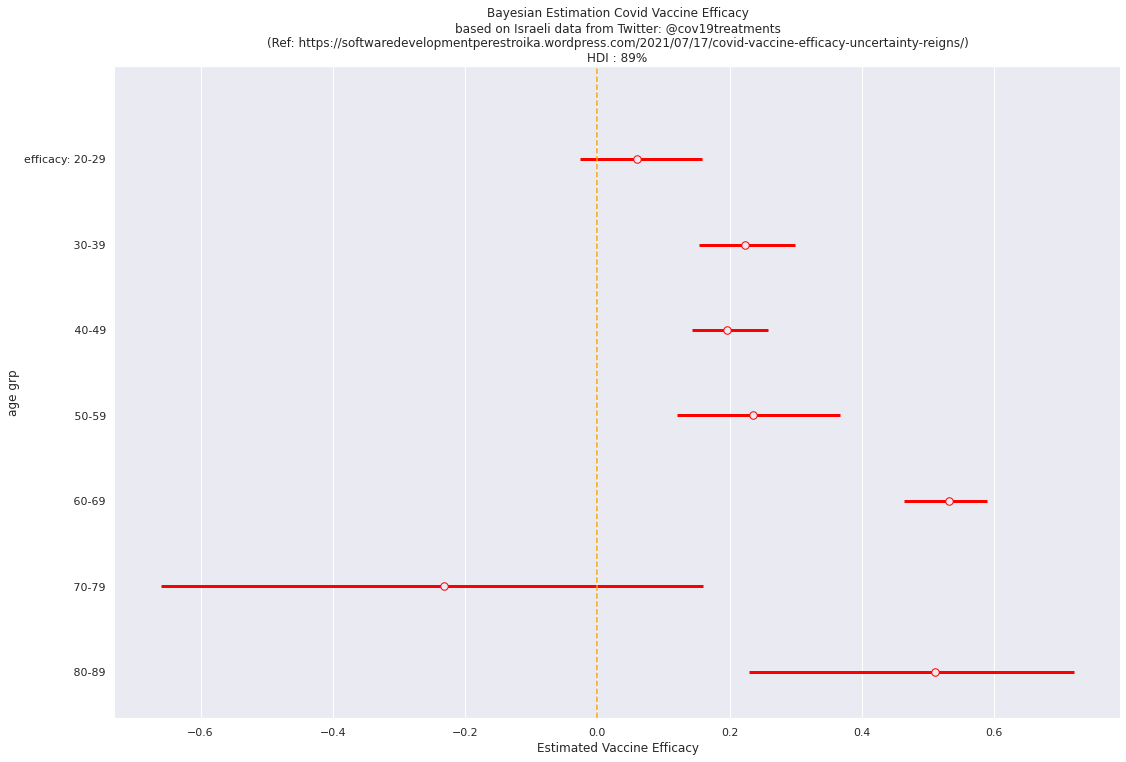

In [275]:
fig,ax = plt.subplots(figsize=(18,12))
az.plot_forest(idata,var_names='efficacy',hdi_prob=0.89,combined=True,colors='red',ax=ax,
              quartiles=False,markersize=10)
ax.axvline(0,ls='dashed',color='orange')
ax.set_title('Bayesian Estimation Covid Vaccine Efficacy\nbased on Israeli data from Twitter: @cov19treatments\n(Ref: https://softwaredevelopmentperestroika.wordpress.com/2021/07/17/covid-vaccine-efficacy-uncertainty-reigns/)\nHDI : 89%')
ax.set_xlabel('Estimated Vaccine Efficacy')
ax.set_ylabel('age grp')
#ax.set_yticklabels(df.index[:-1][::-1])

plt.savefig('ISR_forest_plot.jpg',format='jpg')

In [276]:
coords

{'vax_status': ['no_vax', 'vax'],
 'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']}

Text(0, 0.5, 'age group')

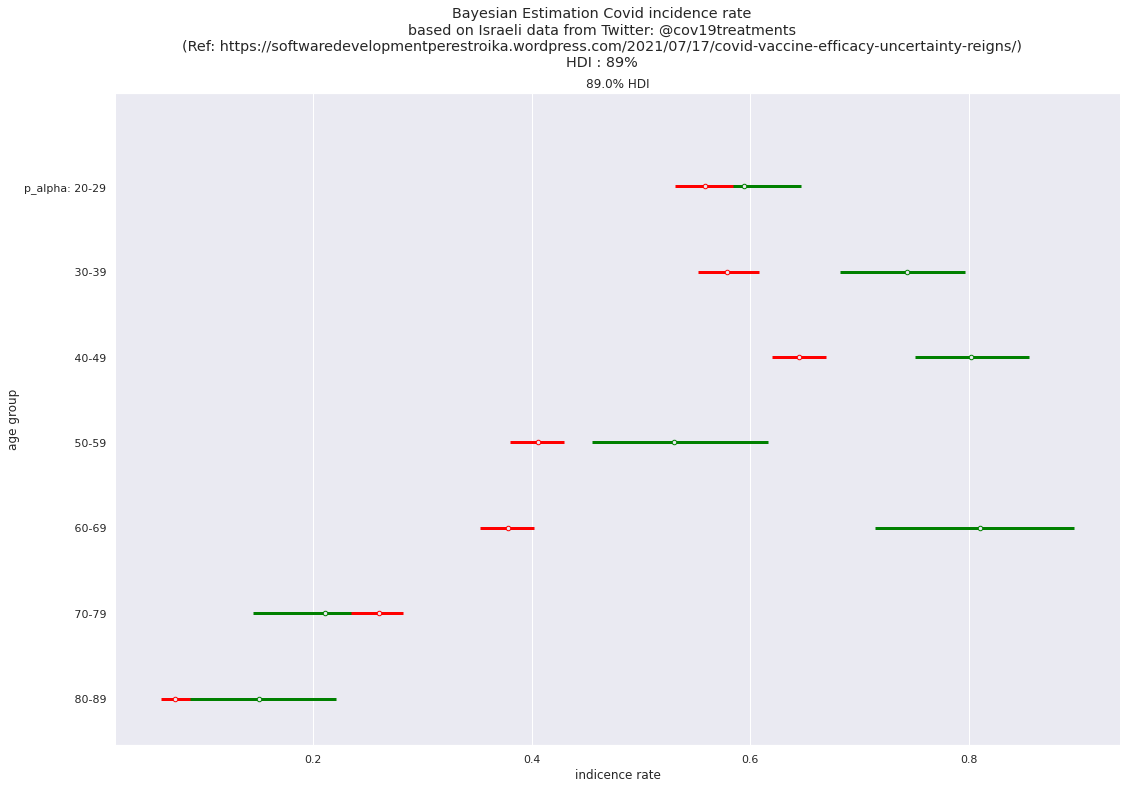

In [277]:
fig,ax = plt.subplots(figsize=(18,12))
az.plot_forest(idata['posterior']['p_alpha'][:,:,0,:],combined=True,ax=ax,colors='green',
               quartiles=False,hdi_prob=0.89)
az.plot_forest(idata['posterior']['p_alpha'][:,:,1,:],combined=True,ax=ax,colors='red',
               hdi_prob=0.89,quartiles=False)

plt.suptitle('Bayesian Estimation Covid incidence rate\nbased on Israeli data from Twitter: @cov19treatments\n(Ref: https://softwaredevelopmentperestroika.wordpress.com/2021/07/17/covid-vaccine-efficacy-uncertainty-reigns/)\nHDI : 89%')
plt.xlabel('indicence rate')
plt.ylabel('age group')


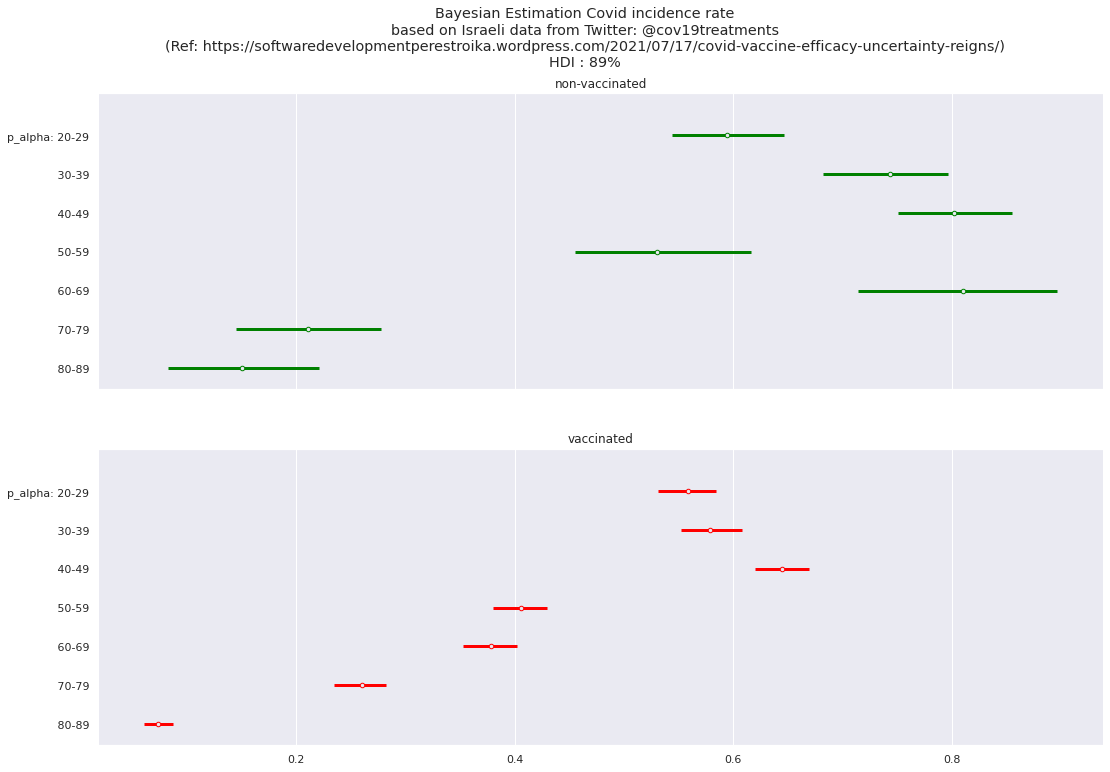

In [278]:
fig,axes = plt.subplots(2,1,figsize=(18,12),sharex=True)
az.plot_forest(idata['posterior']['p_alpha'][:,:,0,:],combined=True,ax=axes[0],
               colors='green',quartiles=False,hdi_prob=0.89)
az.plot_forest(idata['posterior']['p_alpha'][:,:,1,:],combined=True,ax=axes[1],
               colors='red',quartiles=False,hdi_prob=0.89)

axes[0].set_title('non-vaccinated')
axes[1].set_title('vaccinated')

plt.suptitle('Bayesian Estimation Covid incidence rate\nbased on Israeli data from Twitter: @cov19treatments\n(Ref: https://softwaredevelopmentperestroika.wordpress.com/2021/07/17/covid-vaccine-efficacy-uncertainty-reigns/)\nHDI : 89%')
plt.savefig('ISR_incidence_plot.jpg',format='jpg')

In [279]:
df

,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax,rel_diff,efficacy
age,,,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476,0.945386,0.054614
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059,0.775733,0.224267
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143,0.798107,0.201893
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000,0.767296,0.232704
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000,0.458333,0.541667
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000,1.296703,-0.296703
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333,0.542553,0.457447
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000,NaN,NaN


In [280]:
with model:
    dist_summary  = az.summary(trace,hdi_prob=0.89)
    
dist_summary['hdi_range'] = dist_summary['hdi_94.5%'] - dist_summary['hdi_5.5%']
alphas_summary = dist_summary.loc['p_alpha[0,0]': 'p_alpha[1,6]']

i = 0
hdi_ranges = np.zeros(14)

for r,c in alphas_summary.iterrows():
    hdi_ranges[i] = c['hdi_range']
    i += 1
    

print (hdi_ranges)

print (hdi_ranges[:7] / hdi_ranges[7:])

alphas_summary

[0.102 0.114 0.104 0.161 0.182 0.132 0.138 0.053 0.056 0.049 0.05  0.049
 0.048 0.026]
[1.9245283  2.03571429 2.12244898 3.22       3.71428571 2.75
 5.30769231]


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,hdi_range
"p_alpha[0,0]",0.594,0.033,0.544,0.646,0.001,0.001,1095.0,749.0,1.00,0.102
"p_alpha[0,1]",0.743,0.036,0.682,0.796,0.001,0.001,1464.0,660.0,1.00,0.114
"p_alpha[0,2]",0.802,0.032,0.751,0.855,0.001,0.001,952.0,835.0,1.00,0.104
"p_alpha[0,3]",0.532,0.051,0.455,0.616,0.002,0.001,1009.0,785.0,1.00,0.161
"p_alpha[0,4]",0.804,0.058,0.714,0.896,0.002,0.001,1093.0,814.0,1.00,0.182
"p_alpha[0,5]",0.214,0.043,0.146,0.278,0.001,0.001,941.0,746.0,1.01,0.132
"p_alpha[0,6]",0.155,0.045,0.083,0.221,0.001,0.001,1033.0,773.0,1.00,0.138
"p_alpha[1,0]",0.558,0.017,0.531,0.584,0.001,0.000,926.0,774.0,1.00,0.053
"p_alpha[1,1]",0.579,0.017,0.552,0.608,0.000,0.000,1371.0,642.0,1.01,0.056
"p_alpha[1,2]",0.644,0.016,0.620,0.669,0.001,0.000,878.0,800.0,1.00,0.049


In [281]:
with model:
    df.loc[:-1,['bayes_efficacy']] = az.summary(trace,var_names='efficacy',hdi_prob=0.89)['mean'].values
    
df

<ipython-input-281-0d742cd5a135>:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-1,['bayes_efficacy']] = az.summary(trace,var_names='efficacy',hdi_prob=0.89)['mean'].values


,cases_vax,cases_no_vax,pct_pop_vax,pct_vax_of_cases,pop_vax,pop_non_vax,incidence_vax,incidence_non_vax,rel_diff,efficacy,bayes_efficacy
age,,,,,,,,,,,
20-29,441,124,0.79,0.780531,790.0,210.0,0.558228,0.590476,0.945386,0.054614,0.058
30-39,481,127,0.83,0.791118,830.0,170.0,0.579518,0.747059,0.775733,0.224267,0.219
40-49,554,113,0.86,0.830585,860.0,140.0,0.644186,0.807143,0.798107,0.201893,0.196
50-59,366,53,0.90,0.873508,900.0,100.0,0.406667,0.530000,0.767296,0.232704,0.230
60-69,363,33,0.96,0.916667,960.0,40.0,0.378125,0.825000,0.458333,0.541667,0.527
70-79,236,18,0.91,0.929134,910.0,90.0,0.259341,0.200000,1.296703,-0.296703,-0.269
80-89,68,8,0.94,0.894737,940.0,60.0,0.072340,0.133333,0.542553,0.457447,0.479
90+,0,0,0.00,NaN,0.0,1000.0,NaN,0.000000,NaN,NaN,NaN


efficacy[0]   -0.087
efficacy[1]    0.130
efficacy[2]    0.086
efficacy[3]    0.066
efficacy[4]    0.110
efficacy[5]    0.240
efficacy[6]    0.472

In [282]:
to_df = pm.trace_to_dataframe(trace)
to_df.describe()

,alpha_bar_bar,alpha_bar__0_0,alpha_bar__1_0,alpha__0_0,alpha__0_1,alpha__0_2,alpha__0_3,alpha__0_4,alpha__0_5,alpha__0_6,...,p_alpha_rel_diff__4,p_alpha_rel_diff__5,p_alpha_rel_diff__6,efficacy__0,efficacy__1,efficacy__2,efficacy__3,efficacy__4,efficacy__5,efficacy__6
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.056924,0.179104,-0.444454,0.383024,1.068460,1.411643,0.130402,1.456198,-1.322673,-1.733771,...,0.473024,1.268948,0.520996,0.057658,0.219172,0.195917,0.229949,0.526976,-0.268948,0.479004
std,0.915895,0.488742,0.445031,0.138271,0.188140,0.205768,0.207368,0.374259,0.257766,0.348330,...,0.040365,0.274701,0.174528,0.059794,0.045986,0.037425,0.078454,0.040365,0.274701,0.174528
min,-2.682554,-1.826894,-1.931281,-0.089850,0.574280,0.796761,-0.494833,0.288015,-2.117451,-2.820146,...,0.379741,0.724239,0.198338,-0.181260,0.072472,0.045236,-0.103416,0.316662,-1.485613,-0.340212
25%,-0.685822,-0.127951,-0.726374,0.289545,0.944377,1.269393,-0.008406,1.194891,-1.503517,-1.956052,...,0.444015,1.066984,0.397647,0.021533,0.187252,0.173458,0.183532,0.504644,-0.438891,0.391785
50%,-0.038453,0.180796,-0.439020,0.380327,1.063907,1.395653,0.121296,1.449079,-1.315766,-1.728585,...,0.468913,1.232277,0.489657,0.059372,0.222573,0.196816,0.234784,0.531087,-0.232277,0.510343
75%,0.562756,0.493027,-0.148378,0.480900,1.194765,1.542319,0.265155,1.711953,-1.133728,-1.487214,...,0.495356,1.438891,0.608215,0.098719,0.252486,0.221045,0.284510,0.555985,-0.066984,0.602353
max,2.872732,2.268922,0.866658,0.849663,1.702405,2.130418,0.783549,2.869796,-0.622805,-0.736662,...,0.683338,2.485613,1.340212,0.224888,0.336109,0.290458,0.427224,0.620259,0.275761,0.801662


<ipython-input-262-d9c5c658cecc>:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(progressbar=True)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p_B, p_A]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


                 mean     sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
p_A             0.000  0.000     0.000      0.001        0.0      0.0   
p_B             0.007  0.000     0.007      0.008        0.0      0.0   
diff_p_A - p_B -0.007  0.000    -0.008     -0.006        0.0      0.0   
rel_p_A / p_B  -0.950  0.013    -0.969     -0.930        0.0      0.0   
efficacy        0.950  0.013     0.930      0.969        0.0      0.0   

                ess_bulk  ess_tail  r_hat  
p_A               1771.0    1526.0    1.0  
p_B               1747.0    1582.0    1.0  
diff_p_A - p_B    1782.0    1684.0    1.0  
rel_p_A / p_B     1818.0    1482.0    1.0  
efficacy          1818.0    1482.0    1.0  


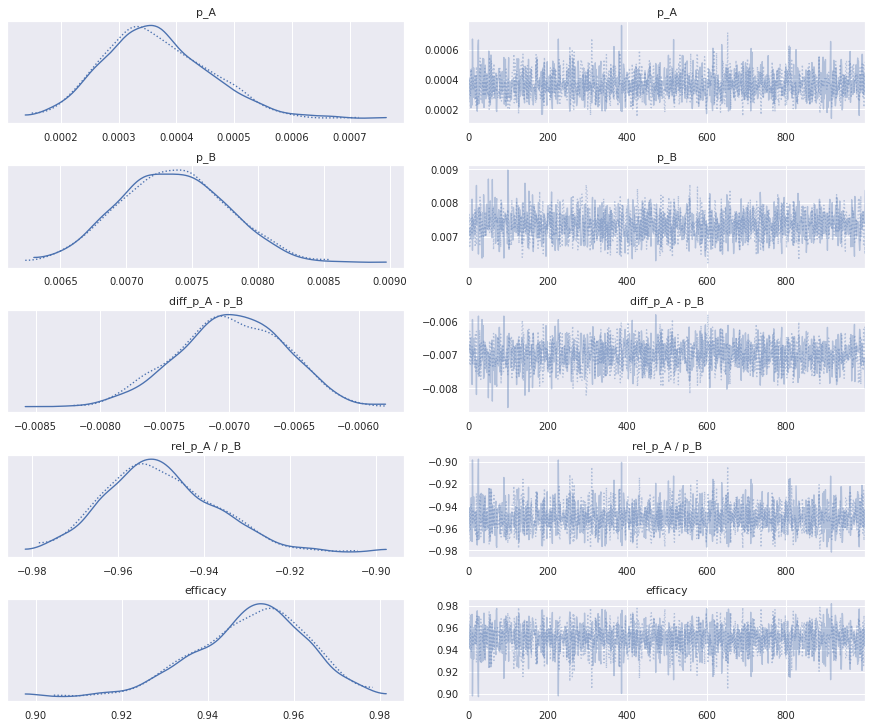

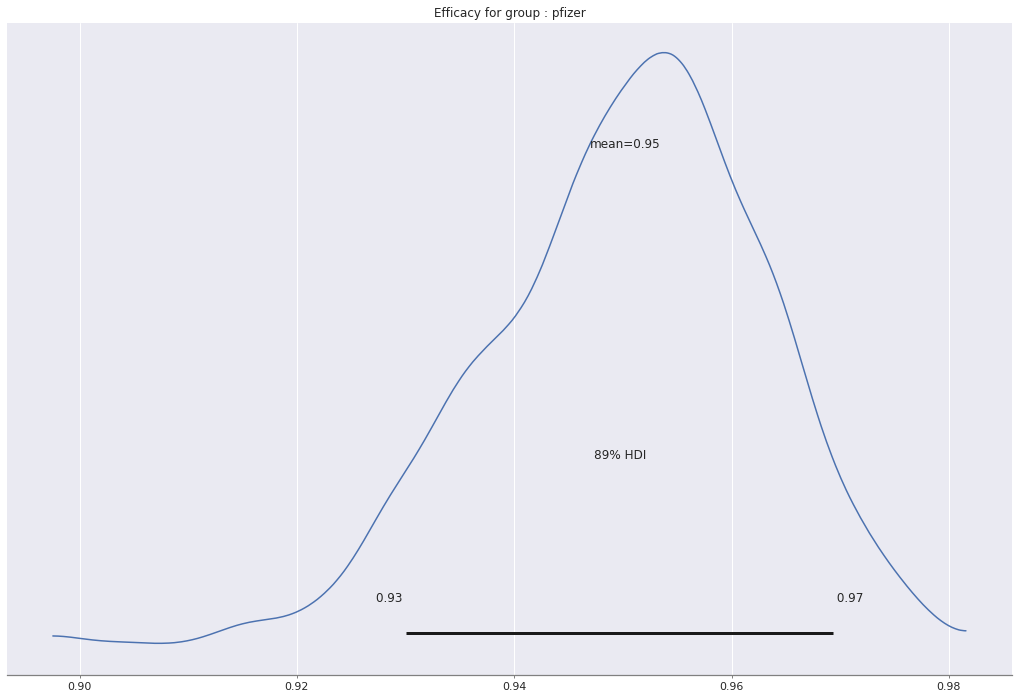

In [283]:
efficacy_dist(22000,8,22000,162,'pfizer',ref_val=False)
plt.savefig('ISR_pfizer.jpg',format='jpg')

[0.05461412821559841, 0.22426714732947528, 0.2018933937024079, 0.23270440251572344, 0.5416666666666663, -0.2967032967032963, 0.4574468085106379, nan]


array([[<AxesSubplot:title={'center':'efficacy\n20-29'}>,
        <AxesSubplot:title={'center':'efficacy\n30-39'}>,
        <AxesSubplot:title={'center':'efficacy\n40-49'}>],
       [<AxesSubplot:title={'center':'efficacy\n50-59'}>,
        <AxesSubplot:title={'center':'efficacy\n60-69'}>,
        <AxesSubplot:title={'center':'efficacy\n70-79'}>],
       [<AxesSubplot:title={'center':'efficacy\n80-89'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

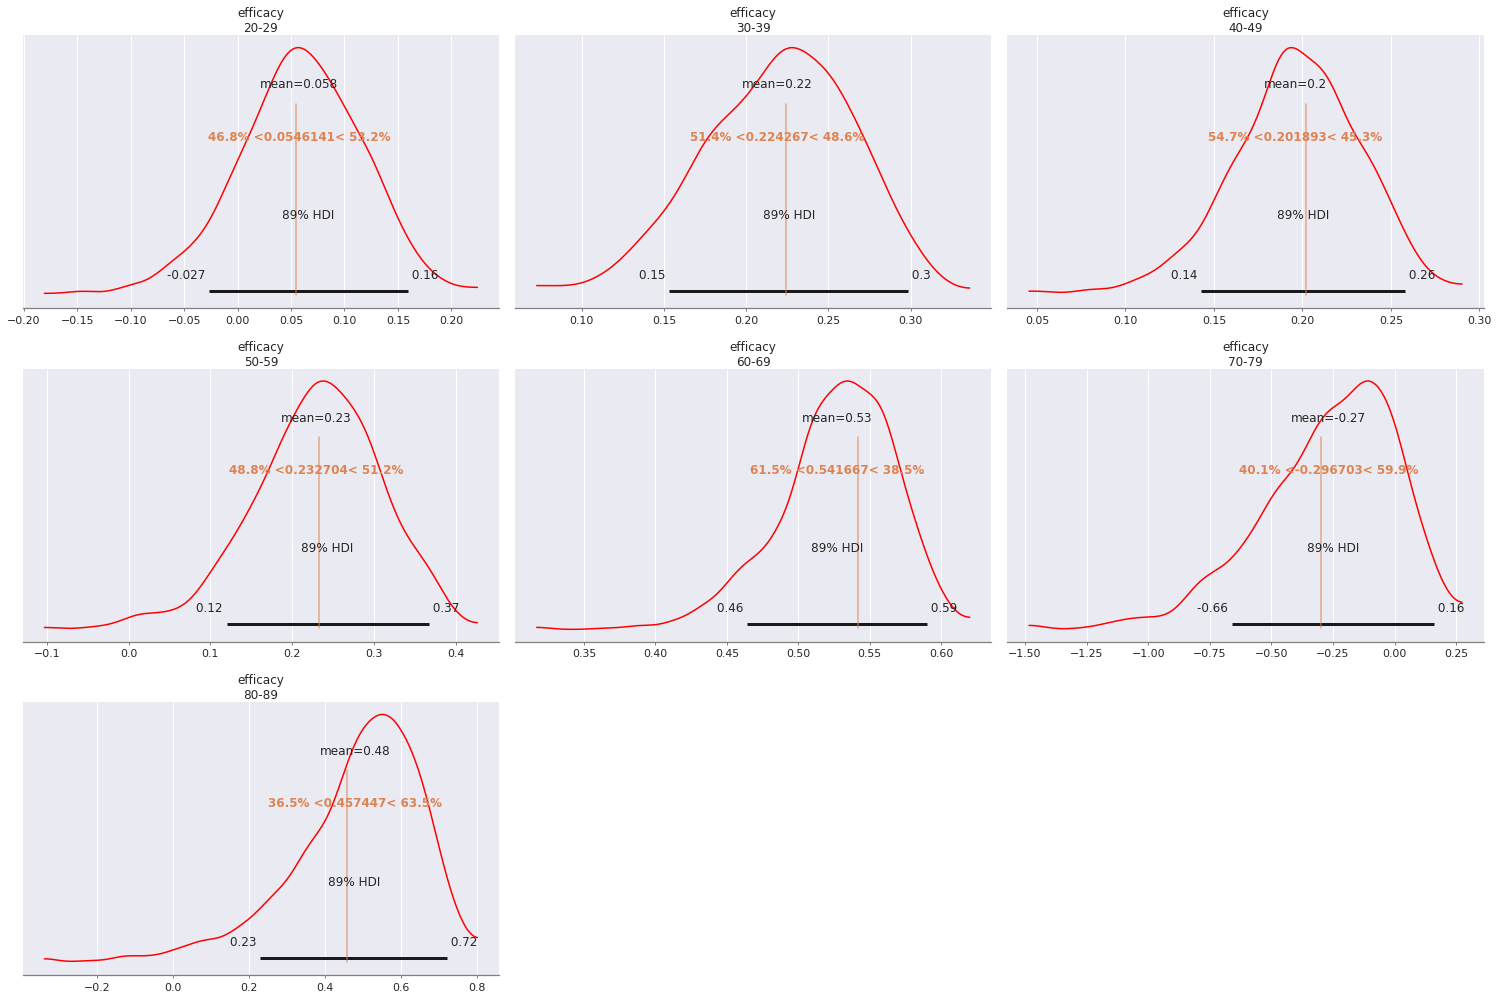

In [284]:
### check to see which way analytic value for efficacy is pulled ### 

print (df['efficacy'].to_list())
az.plot_posterior(idata,var_names='efficacy',color='red',hdi_prob=0.89,ref_val=df['efficacy'].to_list())


In [285]:
alphas_summary['calc_incidence'] = pd.concat([df['incidence_non_vax'][:-1],
    df['incidence_vax'][:-1]]).to_list()

<ipython-input-285-d5cabccf34ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphas_summary['calc_incidence'] = pd.concat([df['incidence_non_vax'][:-1],


In [286]:
alphas_summary

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,hdi_range,calc_incidence
"p_alpha[0,0]",0.594,0.033,0.544,0.646,0.001,0.001,1095.0,749.0,1.00,0.102,0.590476
"p_alpha[0,1]",0.743,0.036,0.682,0.796,0.001,0.001,1464.0,660.0,1.00,0.114,0.747059
"p_alpha[0,2]",0.802,0.032,0.751,0.855,0.001,0.001,952.0,835.0,1.00,0.104,0.807143
"p_alpha[0,3]",0.532,0.051,0.455,0.616,0.002,0.001,1009.0,785.0,1.00,0.161,0.530000
"p_alpha[0,4]",0.804,0.058,0.714,0.896,0.002,0.001,1093.0,814.0,1.00,0.182,0.825000
"p_alpha[0,5]",0.214,0.043,0.146,0.278,0.001,0.001,941.0,746.0,1.01,0.132,0.200000
"p_alpha[0,6]",0.155,0.045,0.083,0.221,0.001,0.001,1033.0,773.0,1.00,0.138,0.133333
"p_alpha[1,0]",0.558,0.017,0.531,0.584,0.001,0.000,926.0,774.0,1.00,0.053,0.558228
"p_alpha[1,1]",0.579,0.017,0.552,0.608,0.000,0.000,1371.0,642.0,1.01,0.056,0.579518
"p_alpha[1,2]",0.644,0.016,0.620,0.669,0.001,0.000,878.0,800.0,1.00,0.049,0.644186


alpha_bar_bar    0.485754
Name: mean, dtype: float64
alpha_bar[0,0]    0.544631
alpha_bar[1,0]    0.390788
Name: mean, dtype: float64


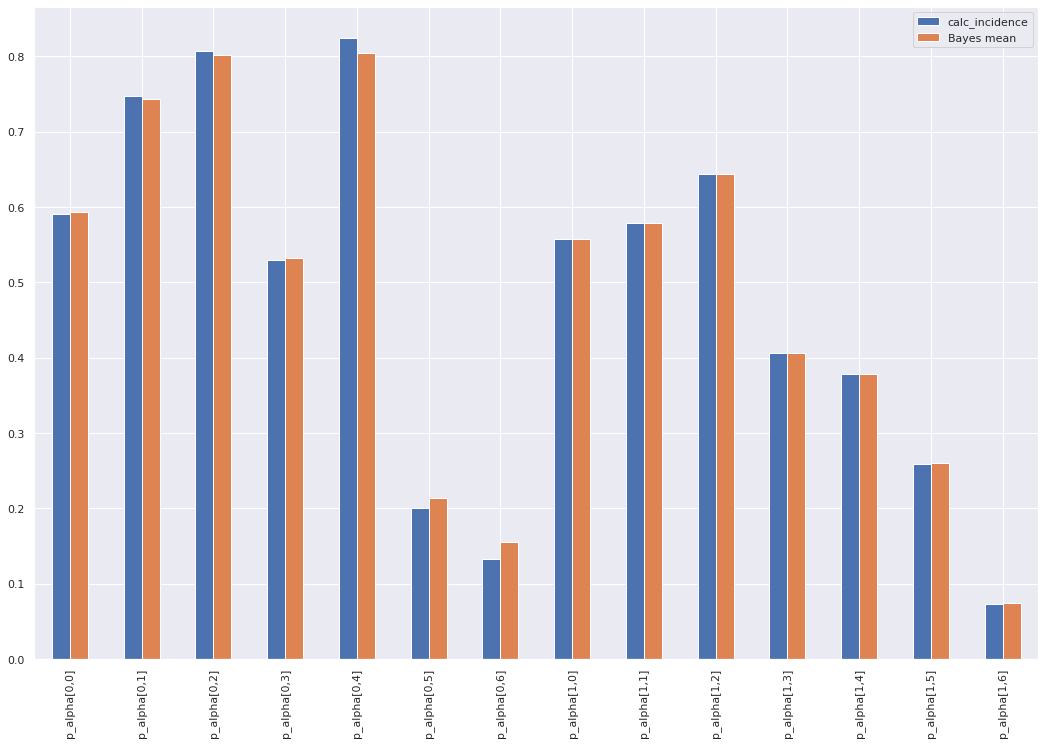

In [287]:
with model:
    
    print (logit_pure((az.summary(trace,var_names='alpha_bar_bar')['mean'])))
    print (logit_pure(az.summary(trace,var_names='alpha_bar')['mean']))
    
### notice how the two cohorts for 80-89 with little data are pulled upwards towards the mean ### 
alphas_summary.plot(kind='bar',y=['calc_incidence','mean'],figsize=(18,12))

plt.legend(['calc_incidence','Bayes mean'])

In [288]:
### PFIZER DATA ###

pfizer_df = pd.DataFrame({'pop_size' : [22000,22000],
                         'infected' : [8,162],
                         'vax_idx' : [1,0]},index=['vax','no_vax'])

pfizer_df['incidence'] = pfizer_df['infected'] / pfizer_df['pop_size']

pfizer_df
    

,pop_size,infected,vax_idx,incidence
vax,22000,8,1,0.000364
no_vax,22000,162,0,0.007364


In [289]:
### FULL POOLING - vax and no vax get their own independent params for log-odds incidence (alpha) ###
### p_alpha covertes log-odds to probabilities ###

coords = {'treatment_status' : ['control_grp','test_grp']}

with pm.Model(coords=coords) as pfizer_model_full_pool:
    
    ### alpha is on log-odds scale ###
    alpha = pm.Normal('alpha',mu=0,sd=1.5,dims=coords)
    
    ### convert log-odds to probabilities ###
    p_alpha = pm.Deterministic('p_alpha',logit_pure(alpha),dims=coords)
    
    efficacy = pm.Deterministic('efficacy',1 - (p_alpha[1] / p_alpha[0]))
    
    obs = pm.Binomial('obs',n=pfizer_df['pop_size'],p=logit_pure(alpha[pfizer_df['vax_idx']]),
                      observed = pfizer_df['infected'])
                      
    trace_pfizer_model_full_pool = pm.sample(1000,tune=1000)

<ipython-input-289-12b1434fbe19>:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_pfizer_model_full_pool = pm.sample(1000,tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.8817610929037605, but should be close to 0.8. Try to increase the number of tuning steps.


In [290]:
with pfizer_model_full_pool:
    pfizer_model_full_pool_summary = az.summary(trace_pfizer_model_full_pool,hdi_prob=0.89,round_to=6)
    
pfizer_model_full_pool_summary

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],-4.892680,0.080391,-5.021607,-4.768626,0.002085,0.001476,1493.487924,1426.961452,1.001588
alpha[1],-7.604824,0.306967,-8.064755,-7.116474,0.008042,0.005688,1487.632818,1296.690057,1.003940
p_alpha[0],0.007469,0.000594,0.006551,0.008421,0.000015,0.000011,1493.487924,1426.961452,1.001588
p_alpha[1],0.000521,0.000158,0.000289,0.000765,0.000004,0.000003,1487.632818,1296.690057,1.002404
efficacy,0.929842,0.021745,0.895902,0.961556,0.000606,0.000429,1378.677642,1471.676882,1.005697


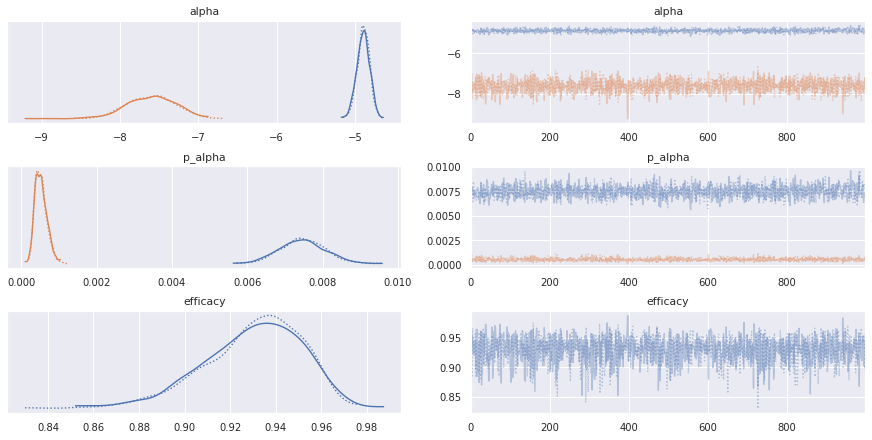

In [291]:
with pfizer_model_full_pool:
    az.plot_trace(trace_pfizer_model_full_pool)

/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'p_alpha\ncontrol_grp'}>,
       <AxesSubplot:title={'center':'p_alpha\ntest_grp'}>], dtype=object)

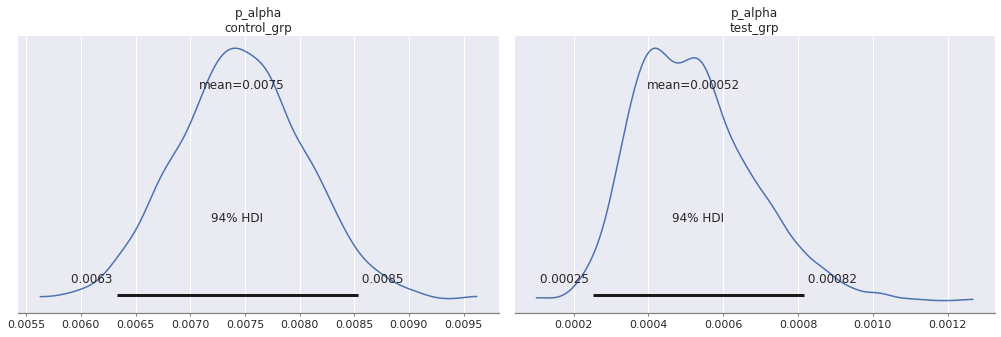

In [292]:
az.plot_posterior(data=trace_pfizer_model_full_pool,var_names='p_alpha')

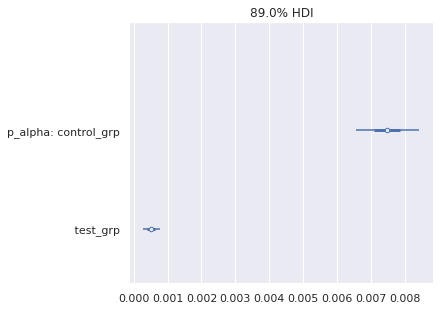

In [293]:
with pfizer_model_full_pool:
    az.plot_forest(trace_pfizer_model_full_pool,var_names='p_alpha',hdi_prob=0.89,combined=True)

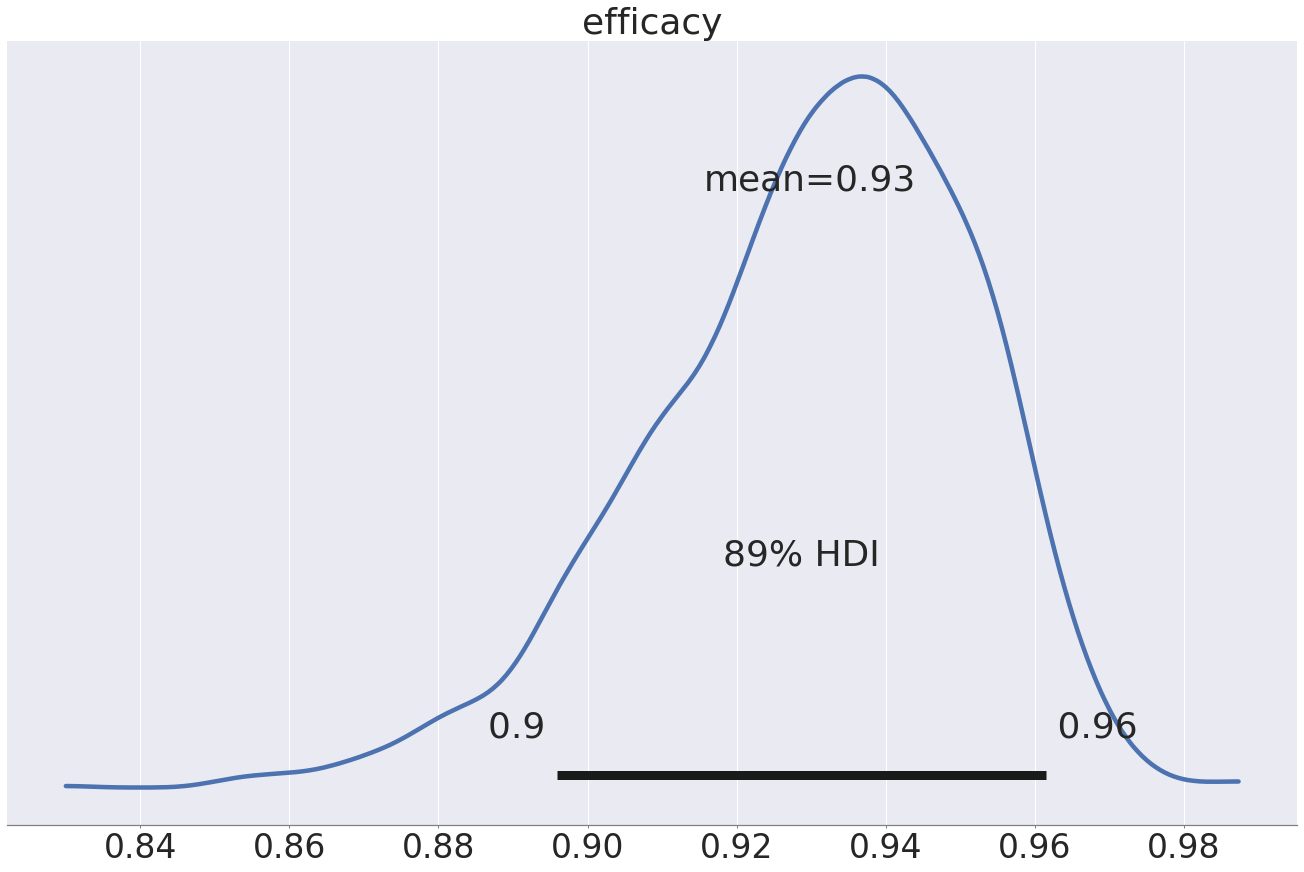

In [294]:
with pfizer_model_full_pool:
    az.plot_posterior(trace_pfizer_model_full_pool,var_names='efficacy',hdi_prob=0.89,figsize=(18,12))

plt.savefig('ISR_Pfizer_efficacy.jpg',format='jpg')

In [295]:
### PARTIAL POOLING - vax and no vax get their own params for log-odds incidence (alpha),###
### but we add a alpha_bar hyperparam ###

### p_alpha covertes log-odds to probabilities ###

coords = {'treatment_status' : ['control_grp','test_grp']}

with pm.Model(coords=coords) as pfizer_model_partial_pool:
    
    alpha_bar = pm.Normal('alpha_bar',mu=0,sd=1.5)
    
    ### alpha is on log-odds scale ###
    alpha = pm.Normal('alpha',mu=alpha_bar,sd=1.5,dims=coords)
    
    ### convert log-odds to probabilities ###
    p_alpha = pm.Deterministic('p_alpha',logit_pure(alpha),dims=coords)
    p_alpha_bar = pm.Deterministic('p_alpha_bar',logit_pure(alpha_bar))
    
    efficacy = pm.Deterministic('efficacy',1 - (p_alpha[1] / p_alpha[0]))
    
    obs = pm.Binomial('obs',n=pfizer_df['pop_size'],p=logit_pure(alpha[pfizer_df['vax_idx']]),
                      observed = pfizer_df['infected'])
                      
    trace_pfizer_model_partial_pool = pm.sample(5000,tune=5000)

<ipython-input-295-f298f041dd71>:24: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_pfizer_model_partial_pool = pm.sample(5000,tune=5000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, alpha_bar]


Sampling 2 chains for 5_000 tune and 5_000 draw iterations (10_000 + 10_000 draws total) took 11 seconds.


In [296]:
### partial pooling lowers the incidence in both cohorts (pulls towards mean) ###
with pfizer_model_partial_pool:
    print (az.summary(trace_pfizer_model_partial_pool,hdi_prob=0.89,round_to=5))

                mean       sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  \
alpha_bar   -4.22418  0.88617  -5.64073   -2.82083    0.00802  0.00567   
alpha[0]    -4.90459  0.07812  -5.02962   -4.78373    0.00077  0.00055   
alpha[1]    -7.78519  0.33215  -8.30538   -7.25584    0.00306  0.00218   
p_alpha[0]   0.00738  0.00057   0.00650    0.00829    0.00001  0.00000   
p_alpha[1]   0.00044  0.00014   0.00021    0.00064    0.00000  0.00000   
p_alpha_bar  0.02074  0.02068   0.00088    0.04169    0.00022  0.00016   
efficacy     0.94023  0.01999   0.91022    0.97079    0.00018  0.00013   

                ess_bulk    ess_tail    r_hat  
alpha_bar    12216.00494  7805.81602  1.00092  
alpha[0]     10212.59926  6381.81464  1.00012  
alpha[1]     12055.17582  7087.86268  1.00026  
p_alpha[0]   10212.59926  6381.81464  1.00010  
p_alpha[1]   12055.17582  7087.86268  1.00050  
p_alpha_bar  12216.00494  7805.81602  1.00059  
efficacy     12152.79600  7076.12867  1.00063  


In [297]:
with pfizer_model_partial_pool:
    pfizer_model_partial_pool_summary = az.summary(trace_pfizer_model_partial_pool,hdi_prob=0.89,round_to=6)
    
pfizer_model_partial_pool_summary

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_bar,-4.224179,0.886172,-5.640727,-2.820827,0.008018,0.005671,12216.004939,7805.816017,1.000918
alpha[0],-4.904585,0.078120,-5.029625,-4.783731,0.000775,0.000550,10212.599264,6381.814636,1.000121
alpha[1],-7.785185,0.332153,-8.305381,-7.255842,0.003058,0.002177,12055.175818,7087.862678,1.000263
p_alpha[0],0.007380,0.000572,0.006496,0.008292,0.000006,0.000004,10212.599264,6381.814636,1.000097
p_alpha[1],0.000438,0.000143,0.000206,0.000639,0.000001,0.000001,12055.175818,7087.862678,1.000501
p_alpha_bar,0.020744,0.020679,0.000875,0.041694,0.000220,0.000162,12216.004939,7805.816017,1.000589
efficacy,0.940231,0.019986,0.910223,0.970789,0.000182,0.000129,12152.796005,7076.128668,1.000627


In [298]:
model_stats = pfizer_model_full_pool_summary[['mean','hdi_5.5%','hdi_94.5%']]

multi_idx = pd.MultiIndex.from_arrays([['Full Pool','Full Pool','Full Pool',
                                       'Partial Pool','Partial Pool','Partial Pool'],
                                      ['mean','HDI_5_5','HDI_94_5',
                                      'mean','HDI_5_5','HDI_94_5']],names=('model','stats'))

                                      
dist_stats = pd.concat([model_stats,pfizer_model_partial_pool_summary[['mean','hdi_5.5%','hdi_94.5%']]],axis=1)
dist_stats.columns=multi_idx
dist_stats

model       Full Pool                     Partial Pool                    
stats            mean   HDI_5_5  HDI_94_5         mean   HDI_5_5  HDI_94_5
alpha[0]    -4.892680 -5.021607 -4.768626    -4.904585 -5.029625 -4.783731
alpha[1]    -7.604824 -8.064755 -7.116474    -7.785185 -8.305381 -7.255842
p_alpha[0]   0.007469  0.006551  0.008421     0.007380  0.006496  0.008292
p_alpha[1]   0.000521  0.000289  0.000765     0.000438  0.000206  0.000639
efficacy     0.929842  0.895902  0.961556     0.940231  0.910223  0.970789
alpha_bar         NaN       NaN       NaN    -4.224179 -5.640727 -2.820827
p_alpha_bar       NaN       NaN       NaN     0.020744  0.000875  0.041694

In [309]:
### [0] is the control group, with more cases (more data). Thus, [1] (test grp) with less cases is pulled more ###
dist_stats.xs('Full Pool',axis=1) / dist_stats.xs('Partial Pool',axis=1)

stats,mean,HDI_5_5,HDI_94_5
alpha[0],0.997573,0.998406,0.996842
alpha[1],0.976833,0.971028,0.980792
p_alpha[0],1.012060,1.008467,1.015557
p_alpha[1],1.189498,1.402913,1.197183
efficacy,0.988951,0.984266,0.990489
alpha_bar,NaN,NaN,NaN
p_alpha_bar,NaN,NaN,NaN


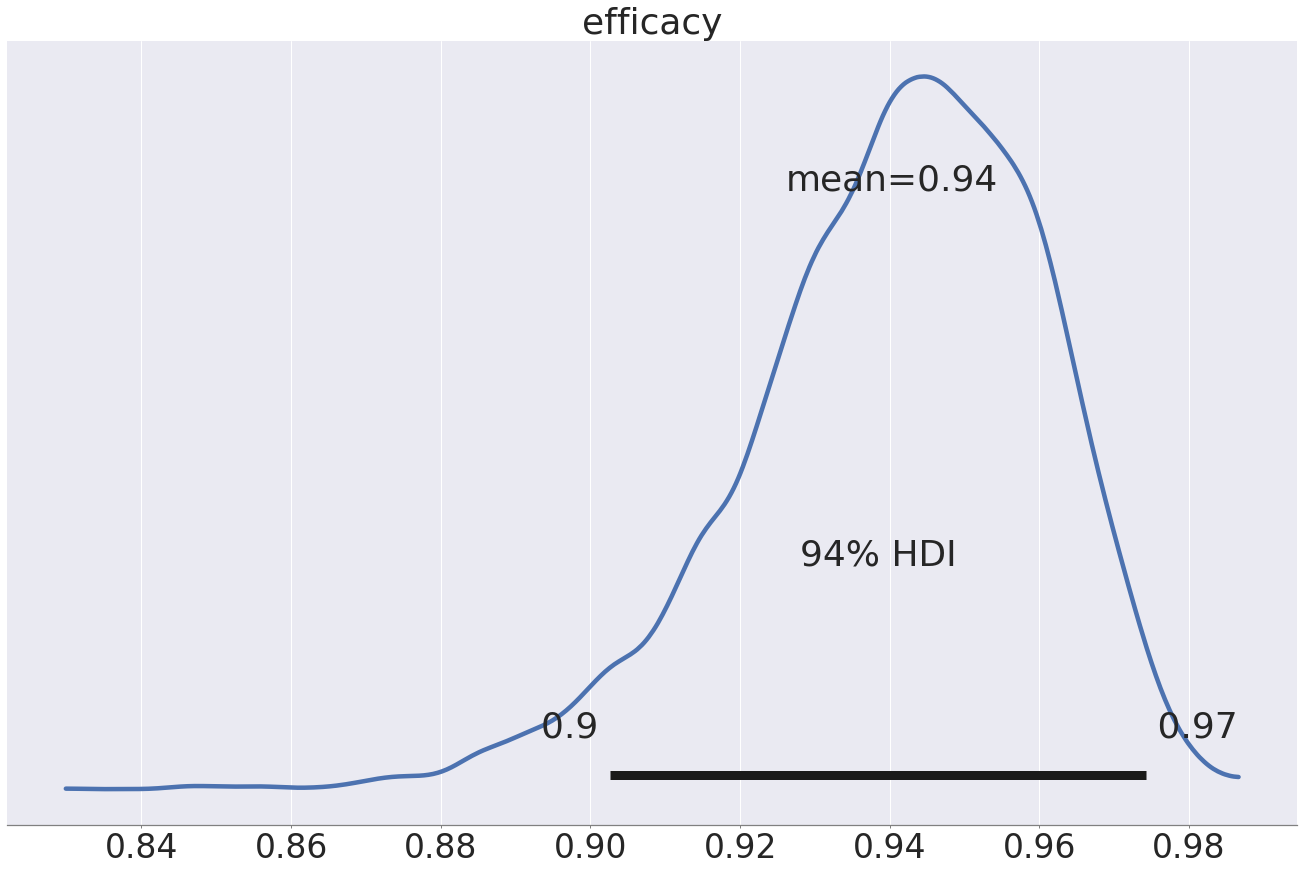

In [299]:
with pfizer_model_partial_pool:
    az.plot_posterior(trace_pfizer_model_partial_pool,var_names='efficacy',figsize=(18,12))
    
plt.savefig('ISR_Pfizer_partial_pool.jpg',format='jpg')

/usr/local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


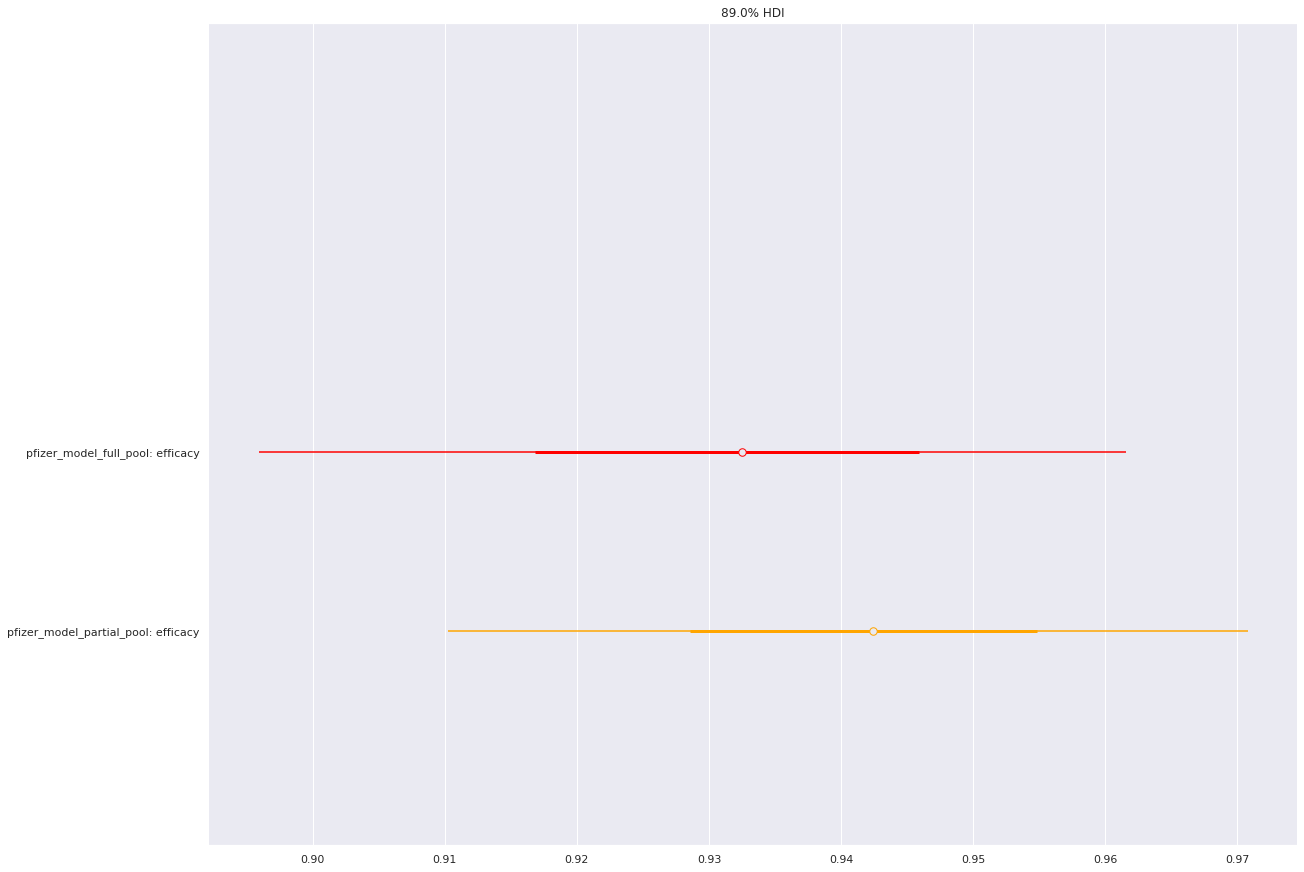

In [300]:
az.plot_forest(data=[trace_pfizer_model_full_pool,trace_pfizer_model_partial_pool],
               var_names='efficacy',model_names=['pfizer_model_full_pool','pfizer_model_partial_pool'],
              hdi_prob=0.89,combined=True,figsize=(18,12),colors=['red','orange'],markersize=10)

plt.savefig('ISR_efficacy_fully_pooled_vs_partially_pooled.jpg',format='jpg')